# STOR 120: Final Exam

**Due:** Thursday, December 9, 11:00 am on Gradescope
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question.

For each question you may use as many lines of code as needed, and may add cells as well. Run the cell below.

**Run the cell below to import the datasets.**

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats
import warnings
warnings.simplefilter('ignore')

# Introduction

In today's final, you will be working with a dataset on popular music. Many individuals have attempted to find ways to differentiate between songs based off different features. In this dataset, we have 50,000 songs that span 10 different genres. A preview of the dataset is shown below:

In [2]:
music = Table.read_table("music_genre.csv")
music.take(np.arange(10))

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre,hip_hop
0,0.115,0.53,172500,0.538,0,0.148,-12.997,0.125,?,0.508,Electronic,0
0,0.178,0.702,890680,0.563,0.89,0.151,-15.157,0.05,130.003,0.581,Electronic,0
0,0.639,0.646,-1,0.319,0.851,0.0839,-19.39,0.0426,124.986,0.0377,Electronic,0
0,1.87e-05,0.534,168000,0.994,0.922,0.359,-1.947,0.046,130.034,0.0295,Electronic,0
0,0.00185,0.657,248480,0.91,0.554,0.471,-5.256,0.174,?,0.718,Electronic,0
0,0.0431,0.494,218690,0.867,5.45e-06,0.109,-4.534,0.0857,?,0.265,Electronic,0
0,0.00417,0.61,-1,0.776,0.579,0.116,-6.09,0.0518,?,0.0596,Electronic,0
0,0.000786,0.751,-1,0.883,0.898,0.0438,-5.759,0.0452,128.001,0.401,Electronic,0
0,0.00123,0.511,175651,0.939,0.359,0.253,-3.161,0.0401,?,0.405,Electronic,0
0,0.00104,0.744,360000,0.86,0.687,0.315,-7.026,0.0498,129.91,0.458,Electronic,0


For the purpose of this exam, the variables in this dataset can be split up into two groups, features and outcomes. We hope to use the features of the songs to predict/classify the two key outcome variables, popularity and genre. A list of the variables that we will use on this final exam are given below:

- Features
    - danceability: Describes how suitable a track is for dancing based on a combination of musical elements.
    - duration_ms: The duration of the track in milliseconds.
    - energy: Represents a perceptual measure of intensity and activity.
    - tempo: The overall estimated tempo of a track in beats per minute (BPM). 
    - valence:  Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Outcomes
    - popularity: Measure from 0 to 99 from not popular to popular.
    - hip_hop: Binary variable (1 = Hip-Hop, 0 = Not Hip-Hop).

## Question 1: Data Cleaning

First thing, we have to do is clean the data. The next few questions will go through some basic steps to get the data ready for modeling. 

If you struggle with any of the questions in this section, show the work for the questions that you can and run the code below. **Do not run this code below if you did everything correctly in the questions below.**

In [8]:
# If you cannot figure out how to do what I ask in questions, run this code.
# This code will load the cleaned version of the file.
# You will need this to work if you want to complete the exam.
# The rest of the exam depends on getting this part correct.
# Only do this if you cannot figure this part out.
# Uncomment the next two lines (remove # sign) and run code.

#music6 = Table().read_table("music6.csv")
#music6

### 1.1 (2 Points)
Remove the variables that I **don't** list in the introduction (previous section). Your table should only have **danceability**, **duration_ms**, **energy**, **tempo**, **valence**,  **popularity**, and **hip_hop**. Call the name of the new table **music2**.

In [3]:
music2 = music.select('danceability', 'duration_ms', 'energy', 'tempo', 'valence', 'popularity', 'hip_hop')

music2 #Do Not Change this Line

danceability,duration_ms,energy,tempo,valence,popularity,hip_hop
0.53,172500,0.538,?,0.508,0,0
0.702,890680,0.563,130.003,0.581,0,0
0.646,-1,0.319,124.986,0.0377,0,0
0.534,168000,0.994,130.034,0.0295,0,0
0.657,248480,0.91,?,0.718,0,0
0.494,218690,0.867,?,0.265,0,0
0.61,-1,0.776,?,0.0596,0,0
0.751,-1,0.883,128.001,0.401,0,0
0.511,175651,0.939,?,0.405,0,0
0.744,360000,0.86,129.91,0.458,0,0


### 1.2 (2 Points)
For simplicity, let's rename some of the variables. Create a new table named **music3** that contains the content in **music2** with the following variables renamed:

- Rename **danceability** to **dance**
- Rename **duration_ms** to **duration**

In [5]:
music3 = music2.relabeled(['danceability', 'duration_ms'], ['dance', 'duration'])
music3

dance,duration,energy,tempo,valence,popularity,hip_hop
0.53,172500,0.538,?,0.508,0,0
0.702,890680,0.563,130.003,0.581,0,0
0.646,-1,0.319,124.986,0.0377,0,0
0.534,168000,0.994,130.034,0.0295,0,0
0.657,248480,0.91,?,0.718,0,0
0.494,218690,0.867,?,0.265,0,0
0.61,-1,0.776,?,0.0596,0,0
0.751,-1,0.883,128.001,0.401,0,0
0.511,175651,0.939,?,0.405,0,0
0.744,360000,0.86,129.91,0.458,0,0


### 1.3 (2 Points)
A negative duration and a duration equal to 0 doesn't make any sense. Duration represents how long the song is. Create a table named **music4** that only keeps songs from **music3** where the duration is strictly greater than 0.

In [6]:
music4 = music3.where('duration', are.above(0))

music4 #Do Not Change this Line

dance,duration,energy,tempo,valence,popularity,hip_hop
0.53,172500,0.538,?,0.508,0,0
0.702,890680,0.563,130.003,0.581,0,0
0.534,168000,0.994,130.034,0.0295,0,0
0.657,248480,0.91,?,0.718,0,0
0.494,218690,0.867,?,0.265,0,0
0.511,175651,0.939,?,0.405,0,0
0.744,360000,0.86,129.91,0.458,0,0
0.8,418100,0.826,119.984,0.342,0,0
0.541,100339,0.803,174.069,0.294,0,0
0.662,352206,0.513,120,0.452,0,0


### 1.4 (2 Points)

There are songs where **tempo** equals "?". We want to remove all of these. Use the **where** method with **are.not_containing** to remove these instances. Create a new table called **music5** which shows this change from **music4**.

In [7]:
music5 = music4.where('tempo', are.not_containing('?'))

music5 #Do Not Change this Line

dance,duration,energy,tempo,valence,popularity,hip_hop
0.702,890680,0.563,130.003,0.581,0,0
0.534,168000,0.994,130.034,0.0295,0,0
0.744,360000,0.86,129.91,0.458,0,0
0.8,418100,0.826,119.984,0.342,0,0
0.541,100339,0.803,174.069,0.294,0,0
0.662,352206,0.513,120,0.452,0,0
0.706,210027,0.863,120.029,0.258,0,0
0.686,186714,0.471,89.975,0.173,0,0
0.701,389130,0.626,120.006,0.305,0,0
0.533,205714,0.468,125.98,0.11,0,0


### 1.5 (3 Points)

Right now, **tempo** is a character variable which means we cannot use mathematics yet on this variable. This is because of the presence of "?" in the column. Now that we removed each "?", we can convert this variable to a float type. The function below named **str_to_float** converts a string to a float.

In [8]:
def str_to_float(x):
    return float(x)

str_to_float("137.5")

137.5

Use the **apply** function to overwrite the string variable **tempo** in **music5** to a float variable **tempo** in a new table named **music6**.

In [16]:
music6 = music5.with_column('tempo', music5.apply(str_to_float, 'tempo'))

np.mean(music6.column("tempo")) #Do Not Change this Line

119.8745229289941

## Question 2: Visualizations and Summary Statistics

The next few questions will go into inspecting our data in the cleaned dataset called **music6**.

### 2.1 (4 Points)

I want you to find the feature that is most strongly correlated with **popularity** and create an appropriate scatter plot. Print out the name of the feature you select and the correlation above the table using the **print** function. You can use as many code blocks as you need to do this.

dance: 0.3578826076788328


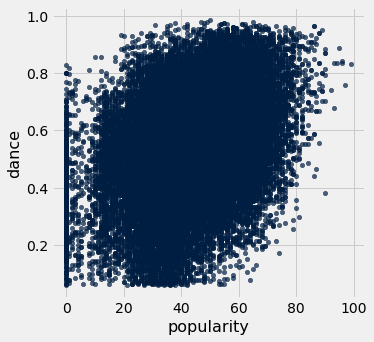

In [144]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

pop_dance_corr = correlation(music6, 'popularity', 'dance')
print('dance:', pop_dance_corr)
music6.scatter('popularity', 'dance')

### 2.2 (4 Points)

Now, I want you to look at the difference in the distribution of **popularity** between the two groups, hip-hop songs and not hip-hop songs. Create a histogram plot using that shows the histogram of the two groups overlayed on the same plot with a legend that indicates the color representing "hip_hop=0" and "hip_hop=1". Also, use the **print** function to show the average popularity of both of these groups and notate them so I know exactly which average is for which group. I recommend using the **print** function twice for each group.

You can use as many code blocks as you need to do this. If you cannot figure out how to overlay the histograms on the same plot then create two separate histograms for the two groups and add a title so I know which plot is for which group. 

hip-hop=0 mean popularity: 42.69862675766795
hip-hop=1 mean popularity: 58.397841550159434


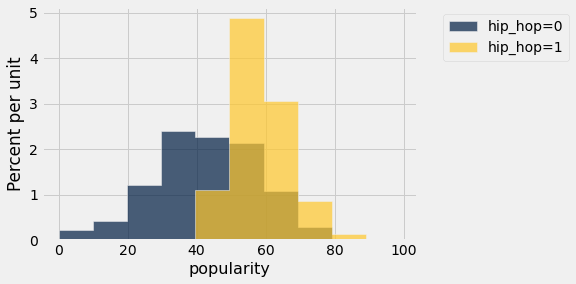

In [58]:
not_hip_hop = np.mean(music6.where('hip_hop', 0).column('popularity'))
hip_hop = np.mean(music6.where('hip_hop', 1).column('popularity'))
music6.hist('popularity', group = 'hip_hop')
print('hip-hop=0 mean popularity:', not_hip_hop)
print('hip-hop=1 mean popularity:', hip_hop)

### 2.3 (3 Points)
The last figure I want you to create is a scatter plot that shows the relationship of any two of the five feature variables. I also want in this figure a legend based off the **hip_hop** variable to show different colors for the two groups, hip-hop songs and not hip-hop songs. Also, use the **plot.title** function properly to add a plot that reads "Relationship between _______ and _________" where you fill in the blanks with the names of the variables you selected.

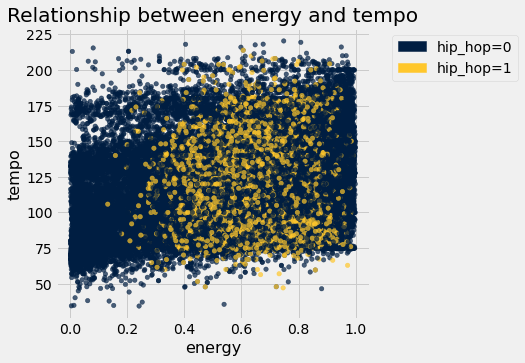

In [145]:
music6.scatter('energy', 'tempo', group = 'hip_hop')
plots.title('Relationship between energy and tempo');

## Question 3: Basic Linear Regression

### 3.1 (3 Points)

Find the slope and intercept for the following linear regression model that is based off the relationship between **valence** and **popularity**:

$$ popularity = a + b*valence $$

Save the intercept into an object named **a** and the slope into an object named **b**. You can use multiple code blocks to do this.

In [63]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

a = intercept(music6, 'valence', 'popularity')
b = slope(music6, 'valence', 'popularity')

a,b #Do Not Change this Line

(40.551087358720515, 8.153686631701177)

### 3.2 (4 Points)

I believe that the happiness people get from listening to music influences the popularity of songs. The variable **valence** can be thought of as a measure of happiness. Use bootstrap samples to create a 90% confidence interval for the slope of the true regression line in the population.  Save the left bound of this interval as **left** and the right bound of this interval as **right**.

You will need multiple code blocks to do this. Use only **100** bootstrap samples to do this and assume that this is large enough. This will take too much time if you do 5,000 bootstrap samples.

In [77]:
slopes = make_array()

for i in np.arange(100):
    shuffled = music6.sample(with_replacement = True)
    slopes = np.append(slopes, slope(shuffled, 'valence', 'popularity'))

left = percentile(5, slopes)
right = percentile(95, slopes)

left,right

(7.704633083936753, 8.563396325932937)

### 3.3 (2 Points)

Using the confidence interval you found, what conclusion would you make about the following hypothes. Write your conclusion in complete sentences and explain how the confidence interval led you to that conclusion.

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

**Answer:** *If the slope of the true line were equal to zero, then our confidence interval would have to contain zero. Since we are 90% confident that the true population mean lies inside of the interval we found, and that interval does not contain zero, we would reject the null hypothesis*.

### 3.4 (3 Points)
Use only **100** bootstrap samples to generate a histogram and 90% confidence interval for the predicted **popularity** based off a **valence** of 0.4. I want to see the following three things:

- Histogram of bootstrap predictions
- Horizontal line representing the 90% confidence interval over the histogram
- The actual values for the left bound and right bound of the confidence interval

You may need multiple lines to do this and make sure you only use **100** bootstrap samples.

left bound: 43.641219048012786
right bound: 43.928630063309555


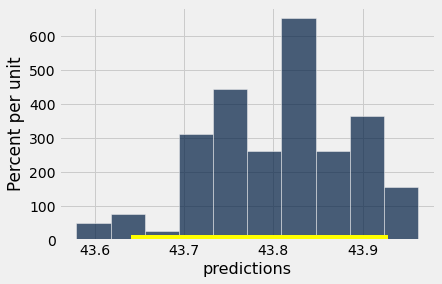

In [89]:
slopes = make_array()
intercepts = make_array()

for i in np.arange(100):
    shuffled = music6.sample(with_replacement = True)
    slopes = np.append(slopes, slope(shuffled, 'valence', 'popularity'))
    intercepts = np.append(intercepts, intercept(shuffled, 'valence', 'popularity'))

predictions = (slopes * 0.4) + intercepts

left = percentile(5, predictions)
right = percentile(95, predictions)

predicted = Table().with_column('predictions', predictions).hist()
plots.plot([left, right], [0, 0], color = 'yellow', lw = 10)

print('left bound:', left)
print('right bound:', right)

## Question 4: Multiple Linear Regression

### 4.1 (4 Points)

I want you to estimate a multiple linear regression model that we can use to predict Y=**popularity** from the five feature variables. The model is as follows:

$$Y = a*dance+b*duration+c*energy+d*tempo+e*valence+f$$

Start by creating a function called **pop_mse** that calculates the mean squared error from this model for chosen coefficients, *a*, *b*, *c*, *d*, *e*, and *f*. Then, run this function for a=3,b=4,c=5,d=6,e=7,f=8. You can use multiple code blocks to do this.

In [90]:
def pop_mse(a, b, c, d, e, f):
    dance = music6.column('dance')
    duration = music6.column('duration')
    energy = music6.column('energy')
    tempo = music6.column('tempo')
    valence = music6.column('valence')
    y = music6.column('popularity')
    fitted = (a * dance) + (b * duration) + (c * energy) + (d * tempo) + (e * valence) + f
    return np.mean((y - fitted) ** 2)

pop_mse(3, 4, 5, 6, 7, 8)

1159615297111.3818

### 4.2 (2 Points)
Find the coefficients for the regression model that minimize the mean squared error and save them to an array named **best_coef**.

In [91]:
best_coef = minimize(pop_mse)

best_coef #Do Not Change this Line

array([ 3.03174853e+01, -5.80786120e-06,  9.14367592e+00,  2.10444494e-03,
       -5.76643926e+00,  2.56659042e+01])

### 4.3 (4 Points)
Based on the coefficients estimated in the previous question for the multiple linear regression model, I want you to obtain the fitted values and the residuals for each observation in **music6**. Create a table called **mr_music** that contains all of the information from **music6** with two new variables **pop_fit** and **pop_res** with the fitted values and residuals, respectively.

In [102]:
fitted = (best_coef.item(0) * music6.column(0)) + (best_coef.item(1) * music6.column(1)) + (best_coef.item(2) * music6.column(2)) + (best_coef.item(3) * music6.column(3)) + (best_coef.item(4) * music6.column(4)) + best_coef.item(5)
residuals = music6.column('popularity') - fitted

mr_music = music6.with_columns(
    'pop_fit', fitted,
    'pop_res', residuals
)

mr_music #Do Not Change this Line

dance,duration,energy,tempo,valence,popularity,hip_hop,pop_fit,pop_res
0.702,890680,0.563,130.003,0.581,0,0,43.847,-43.847
0.534,168000,0.994,130.034,0.0295,0,0,50.0721,-50.0721
0.744,360000,0.86,129.91,0.458,0,0,51.6272,-51.6272
0.8,418100,0.826,119.984,0.342,0,0,53.3247,-53.3247
0.541,100339,0.803,174.069,0.294,0,0,47.4983,-47.4983
0.662,352206,0.513,120,0.452,0,0,46.0273,-46.0273
0.706,210027,0.863,120.029,0.258,0,0,52.5061,-52.5061
0.686,186714,0.471,89.975,0.173,0,0,48.8777,-48.8777
0.701,389130,0.626,120.006,0.305,0,0,48.8762,-48.8762
0.533,205714,0.468,125.98,0.11,0,0,44.5404,-44.5404


## Question 5: Classification

Now, we  want to try to classify a song as hip-hop based on the five feature variables in the dataset? 

### 5.1 (3 Points)

We have 50,000 songs right now in our dataset which makes our methods extremely slow. I want you to use the sample method to randomly sample 2,000 songs from the 50,000 songs. Create a table named **samp_music** that contains your sample of 2,000 songs without the **popularity** variable since this is not one of the 5 features.

In [109]:
# This line of code will force you to take the same 'random' sample each time that the cell is run.
np.random.seed(480) # Do not change this line. 

samp_music = music6.drop('popularity').sample(2000)

samp_music #Do Not Change this Line

dance,duration,energy,tempo,valence,hip_hop
0.659,126315,0.0343,129.97,0.596,0
0.505,215080,0.79,155.934,0.445,0
0.701,241613,0.788,128.018,0.816,0
0.483,185093,0.909,94.982,0.228,0
0.586,261320,0.619,120.125,0.326,1
0.559,253619,0.476,79.24,0.707,0
0.511,209826,0.524,85.03,0.491,0
0.437,304427,0.0803,97.336,0.268,0
0.608,250069,0.473,80.011,0.604,0
0.678,194893,0.582,104.961,0.306,0


### 5.2 (3 Points)
For classification using K-nearest neighbors, we need to standardize our feature variables. Create variables **dance_SU**, **duration_SU**, **energy_SU**, **tempo_SU**, and **valence_SU** that are standardized versions of their respective variables from **samp_music**. Create a table named **samp_music2** that only contains these new standardized variables and the **hip_hop** variable from **samp_music**. You may need multiple code blocks to do this.

In [129]:
samp_music2 = Table().with_columns(
    'dance_SU', standard_units(samp_music.column('dance')),
    'duration_SU', standard_units(samp_music.column('duration')),
    'energy_SU', standard_units(samp_music.column('energy')),
    'tempo_SU', standard_units(samp_music.column('tempo')),
    'valence_SU', standard_units(samp_music.column('valence')),
    'hip_hop', samp_music.column('hip_hop')
)

samp_music2 #Do Not Change this Line

dance_SU,duration_SU,energy_SU,tempo_SU,valence_SU,hip_hop
0.547504,-1.12581,-2.14158,0.315342,0.53756,0
-0.34867,-0.298205,0.709184,1.17861,-0.0811691,0
0.791914,-0.0508232,0.701639,0.25044,1.43902,0
-0.476694,-0.577789,1.15809,-0.84796,-0.970336,0
0.122694,0.132916,0.0641116,-0.0119909,-0.568777,1
-0.034427,0.0611152,-0.475334,-1.37136,0.992388,0
-0.313754,-0.34719,-0.294262,-1.17885,0.107318,0
-0.744382,0.534825,-1.96805,-0.769693,-0.806434,0
0.250719,0.0280166,-0.486651,-1.34573,0.57034,0
0.65807,-0.486419,-0.0754653,-0.516173,-0.650728,0


### 5.3 (3 Points)
Next, we need to split the data in **samp_music2** into a training dataset and a testing dataset. Randomly sample 80% of the data from **samp_music2** into a dataset called **train** and put the rest of the data not randomly sampled into a dataset called **test**.

In [130]:
# This line of code will force you to take the same 'random' sample each time that the cell is run.
np.random.seed(480) # Do not change this line. 

train = samp_music2.take(np.arange(1600))
test = samp_music2.take(np.arange(1600, 2000))

train, test # Do not change this line.

(dance_SU  | duration_SU | energy_SU  | tempo_SU   | valence_SU | hip_hop
 0.547504  | -1.12581    | -2.14158   | 0.315342   | 0.53756    | 0
 -0.34867  | -0.298205   | 0.709184   | 1.17861    | -0.0811691 | 0
 0.791914  | -0.0508232  | 0.701639   | 0.25044    | 1.43902    | 0
 -0.476694 | -0.577789   | 1.15809    | -0.84796   | -0.970336  | 0
 0.122694  | 0.132916    | 0.0641116  | -0.0119909 | -0.568777  | 1
 -0.034427 | 0.0611152   | -0.475334  | -1.37136   | 0.992388   | 0
 -0.313754 | -0.34719    | -0.294262  | -1.17885   | 0.107318   | 0
 -0.744382 | 0.534825    | -1.96805   | -0.769693  | -0.806434  | 0
 0.250719  | 0.0280166   | -0.486651  | -1.34573   | 0.57034    | 0
 0.65807   | -0.486419   | -0.0754653 | -0.516173  | -0.650728  | 0
 ... (1590 rows omitted),
 dance_SU   | duration_SU | energy_SU | tempo_SU   | valence_SU | hip_hop
 0.821011   | 0.825962    | 0.0527946 | -0.0835419 | -0.265559  | 0
 -0.0868008 | -0.507798   | 1.06001   | 0.981444   | -0.1959    | 0
 0.733721 

### 5.4 (6 Points)

Evaluate the accuracy in the test set of a K-nearest neighbor classifer where K=10. In other words, using the 10 nearest neighbors in the training data, classify each song in test as hip-hop or not hip_hop, then calculate the proportion of the time that you correctly classify a song in the test set. You may use multiple code blocks to answer this question. Also, make sure the accuracy rate prints out.

In [143]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('hip_hop')
    def distance_from_point(row):
        return distance(np.array(list(new_point)), np.array(list(row)))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('hip_hop', are.equal_to(1)).num_rows
    zeros = topkclasses.where('hip_hop', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('hip_hop')
    return majority(topkclasses)

def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('hip_hop')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('hip_hop').item(i))
    return num_correct / test.num_rows

evaluate_accuracy(train, test, 10)

0.9425